In [95]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [96]:
import pandas as pd
import numpy as np
import seaborn as sns

In [97]:
df = pd.read_csv(r'D:\zhuomianshangdedawu\US_Accidents_March23_sampled_500k\US_Accidents_March23_sampled_500k.csv', encoding='ISO-8859-1')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['Resolution_Time'] = (df['End_Time'] - df['Start_Time']) / pd.Timedelta(hours=1)
df['hour_of_Accident'] = pd.to_datetime(df['Start_Time'], errors='coerce').dt.hour
df['Year_Of_Accident'] = pd.to_datetime(df['Start_Time']).dt.year
df['months_of_accident'] = df['Start_Time'].dt.month
hour_count = pd.to_datetime(df['Start_Time']).dt.hour.value_counts().sort_index().reset_index(name='Count')
hour_count.columns = ['Hour', 'Counts']

In [98]:
def analyze_accidents_by_year(df):
    """
    分析事故数据，按年份统计事故数量并绘制折线图
    
    参数:
    - df: 包含事故数据的 DataFrame，必须包含 'Year_Of_Accident' 列
    """
    # 按年份统计事故数量
    year_counts = df['Year_Of_Accident'].value_counts().sort_index().reset_index(name='Counts')
    
    # 设置列名
    year_counts.columns = ['Year_Of_Accident', 'Counts']
    
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    year_counts.plot(kind='line', x='Year_Of_Accident', y='Counts', marker='o', ylabel='Count')
    
    # 设置标题
    plt.title('Accidents Count by Year')
    plt.xlabel('Year of Accident')
    plt.ylabel('Number of Accidents')
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()


def analyze_accidents_by_month(df):
 
    # 提取月份
    df['Month'] = df['Start_Time'].dt.month
    
    # 按月份统计事故数量
    month_counts = df['Month'].value_counts().sort_index().reset_index(name='Counts')
    
    # 设置列名
    month_counts.columns = ['Month', 'Counts']
    
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    month_counts.plot(kind='line', x='Month', y='Counts', marker='o', ylabel='Count')
    
    # 设置标题
    plt.title('Accidents Count by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()



import pandas as pd
import matplotlib.pyplot as plt

def analyze_accidents_by_hour(df):
    """
    分析事故数据，按小时统计事故数量并绘制折线图
    
    参数:
    - df: 包含事故数据的 DataFrame，必须包含 'Start_Time' 列
    """
    # 确保 'Start_Time' 列是 datetime 类型
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    
    # 提取小时
    df['Hour'] = df['Start_Time'].dt.hour
    
    # 按小时统计事故数量
    hour_counts = df['Hour'].value_counts().sort_index().reset_index(name='Counts')
    
    # 设置列名
    hour_counts.columns = ['Hour', 'Counts']
    
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    plt.plot(hour_counts['Hour'], hour_counts['Counts'], marker='o', linestyle='-', color='b')
    
    # 设置标题
    plt.title('Accidents Count by Hour of the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    
    # 设置网格
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()


<Figure size 1000x600 with 0 Axes>

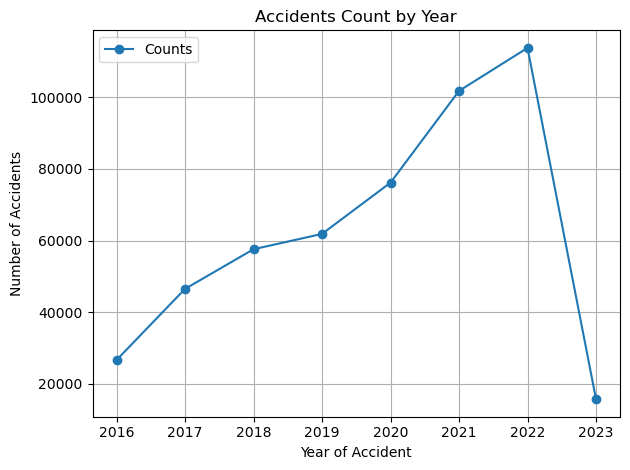

<Figure size 1000x600 with 0 Axes>

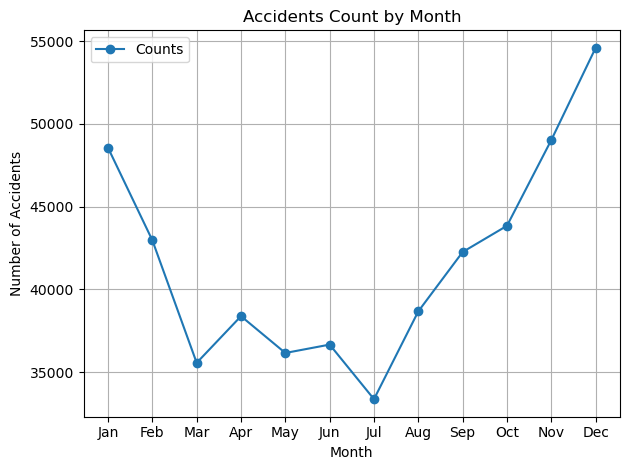

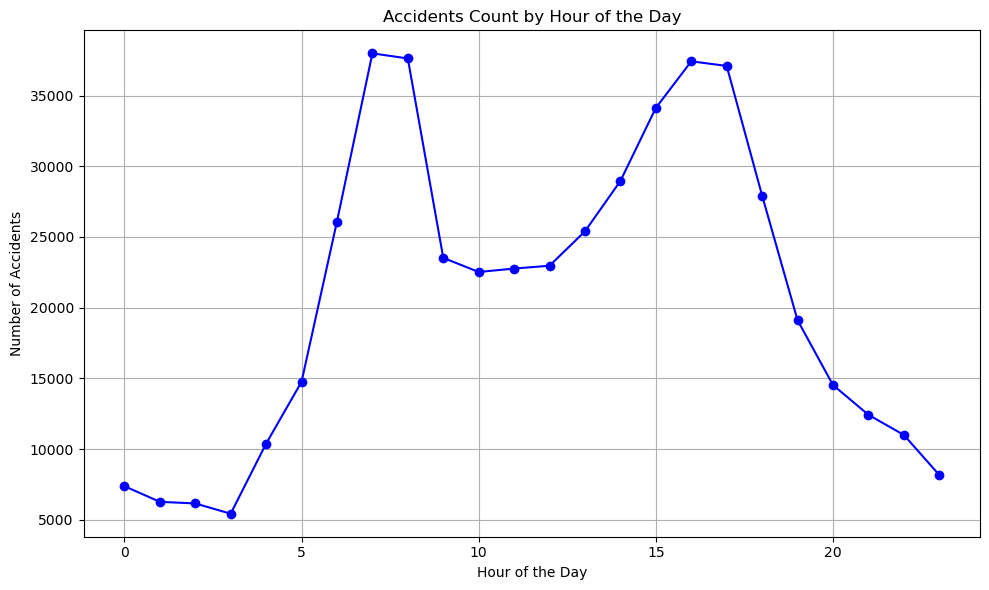

In [99]:

analyze_accidents_by_year(df)  # 按年份绘图
analyze_accidents_by_month(df)  # 按月份绘图
analyze_accidents_by_hour(df)

In [100]:
def analyze_accidents_by_time(df, interval=60):
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

    # 提取日期和小时
    df['Date'] = df['Start_Time'].dt.date
    df['Hour'] = df['Start_Time'].dt.hour

    # 统计每个日期和小时的事故数量
    accident_counts_by_hour = df.groupby(['Date', 'Hour']).size().unstack(fill_value=0)

    # 选择每隔 interval 天的日期
    dates_to_display = accident_counts_by_hour.index[::interval]

    # 创建热力图
    plt.figure(figsize=(14, 8))
    sns.heatmap(accident_counts_by_hour.loc[dates_to_display], cmap='Blues', cbar_kws={'label': 'Number of Accidents'}, annot=False, fmt='d')

    # 设置标题和标签
    plt.title('Accidents Count by Date and Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Date')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # 显示图表
    plt.show()


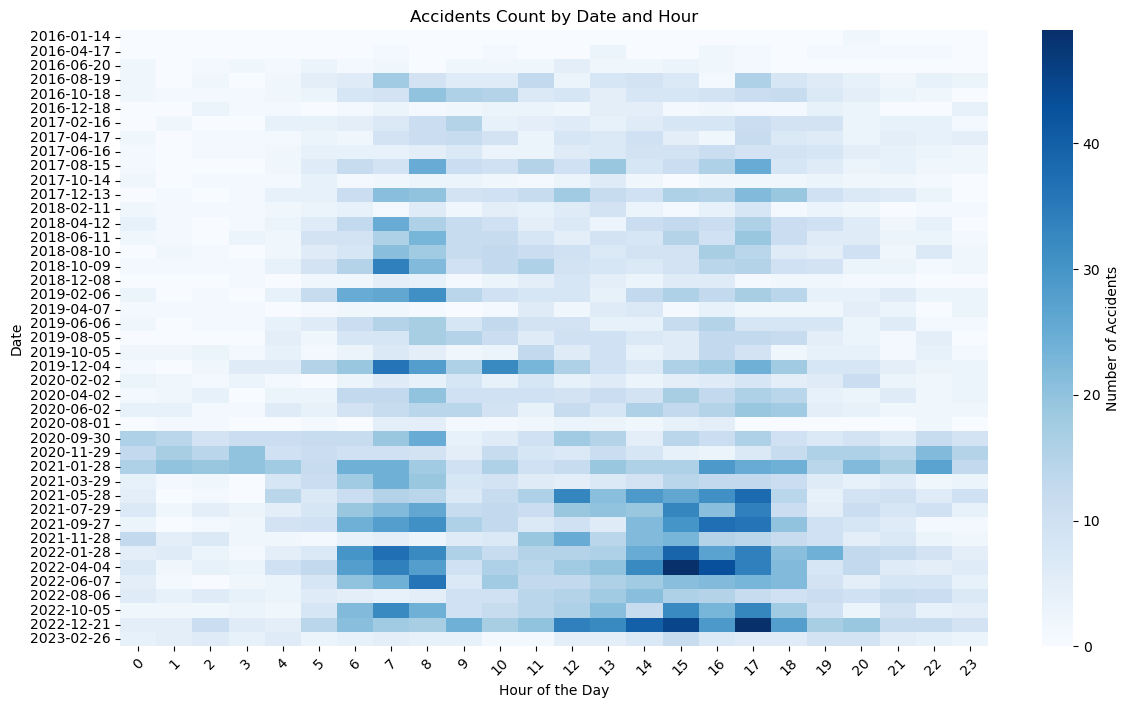

In [101]:
analyze_accidents_by_time(df, interval=60)


In [102]:


# 函数1：提取年和事故严重性
def get_severity_by_year(df):
    # 提取年份并按年份统计事故严重性的平均值
    df['Year'] = df['Start_Time'].dt.year
    return df.groupby('Year')['Severity'].mean().reset_index()

# 函数2：提取月和事故严重性
def get_severity_by_month(df):
    # 提取月份并按月份统计事故严重性的平均值
    df['Month'] = df['Start_Time'].dt.month
    return df.groupby('Month')['Severity'].mean().reset_index()

# 函数3：提取小时和事故严重性
def get_severity_by_hour(df):
    # 提取小时并按小时统计事故严重性的平均值
    df['Hour'] = df['Start_Time'].dt.hour
    return df.groupby('Hour')['Severity'].mean().reset_index()

# 函数4：绘制时间与事故严重性关系的折线图
def plot_severity_by_time(severity_by_time, time_column, title, x_labels=None):
    # 绘制折线图
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=time_column, y='Severity', data=severity_by_time, marker='o', color='b')
    
    # 设置标题和标签
    plt.title(title)
    plt.xlabel(time_column.capitalize())
    plt.ylabel('Average Severity')
    plt.grid(True)
    if x_labels:
        plt.xticks(range(len(x_labels)), x_labels)
    
    # 显示图表
    plt.tight_layout()
    plt.show()

# 主函数：展示年、月、小时与事故严重性的关系
def analyze_time_vs_severity(df):
    # 按年统计事故严重性
    severity_by_year = get_severity_by_year(df)
    plot_severity_by_time(severity_by_year, 'Year', 'Average Accident Severity by Year')

    # 按月统计事故严重性
    severity_by_month = get_severity_by_month(df)
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plot_severity_by_time(severity_by_month, 'Month', 'Average Accident Severity by Month', month_labels)

    # 按小时统计事故严重性
    severity_by_hour = get_severity_by_hour(df)
    plot_severity_by_time(severity_by_hour, 'Hour', 'Average Accident Severity by Hour')

# 你可以在主函数中调用analyze_time_vs_severity来进行分析


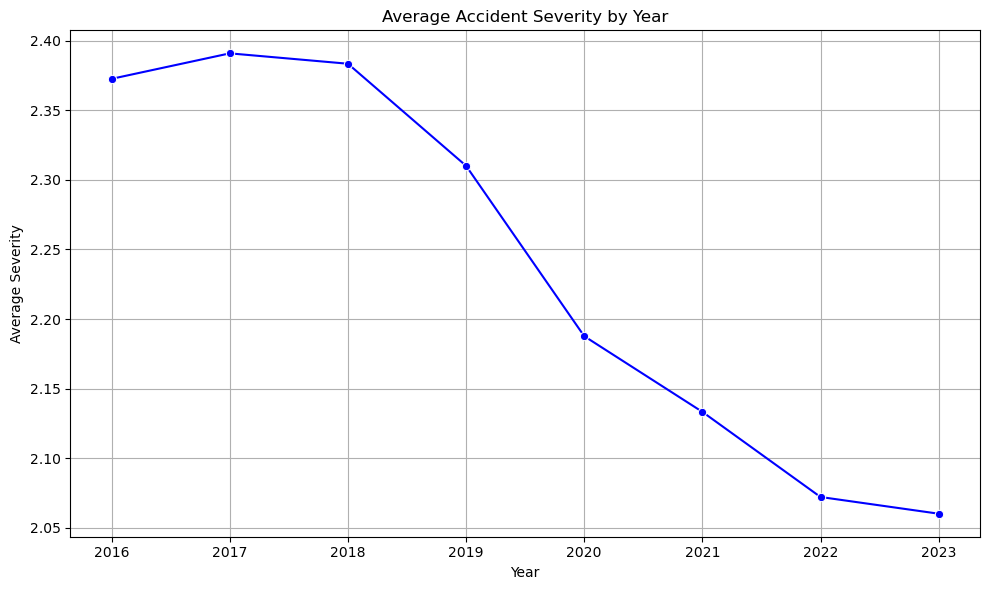

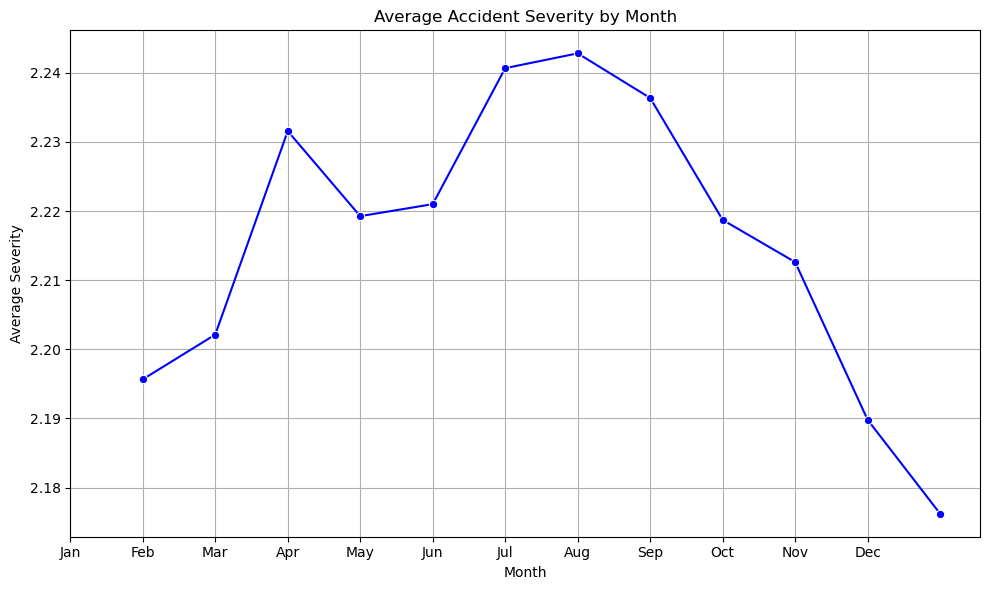

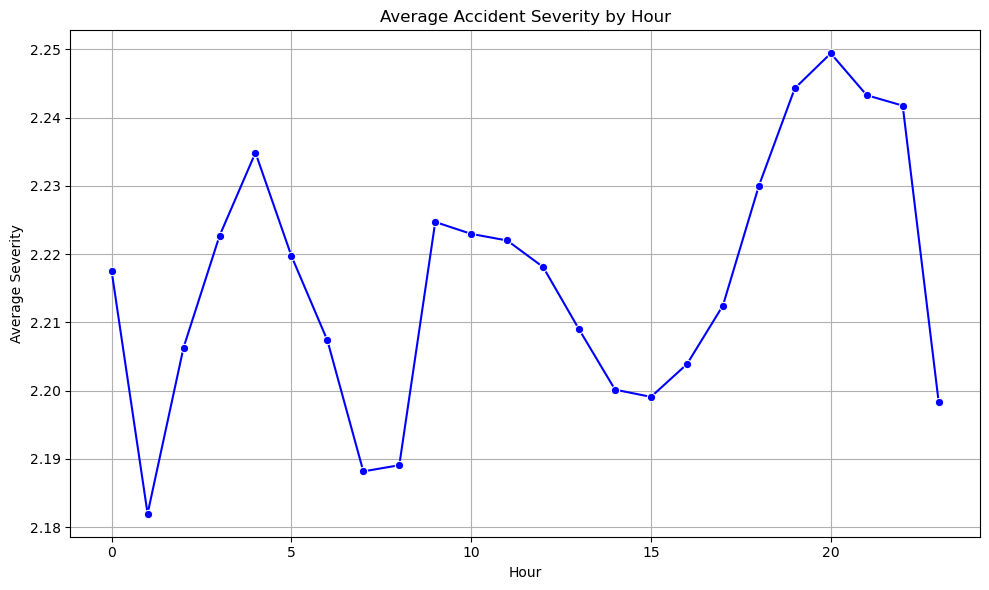

In [103]:
analyze_time_vs_severity(df)